<a href="https://colab.research.google.com/github/josefstrnad/02_Spaceship_Titanic_Final/blob/main/Spaceship_Titanic_Final_GIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In [1]:
'''
File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False. 

Train: 
All except PassengerId, Name, Transported

Target:
Transported'''

"\nFile and Data Field Descriptions\ntrain.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.\nPassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.\nHomePlanet - The planet the passenger departed from, typically their planet of permanent residence.\nCryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.\nCabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.\nDestination - The planet the passenger will be debarking to.\nAge - The age of the passenger.\nVIP - Whether the passenger has paid for special VIP service during the voyage.\nRoomService, FoodCou

# 1. Importing Modules (Libraries) and loading data

In [2]:
import pandas as pd
import numpy as np

In [3]:
!git clone https://github.com/josefstrnad/02_Spaceship_Titanic_Final

Cloning into '02_Spaceship_Titanic_Final'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [4]:
train_data = pd.read_csv(f"/content/02_Spaceship_Titanic_Final/train.csv")
test_data = pd.read_csv(f"/content/02_Spaceship_Titanic_Final/test.csv")
sub_df = pd.read_csv(f"/content/02_Spaceship_Titanic_Final/sample_submission.csv")
df = pd.concat([train_data, test_data])

In [5]:
train_data.shape

(8693, 14)

In [6]:
test_data.shape

(4277, 13)

In [7]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [12]:
df.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


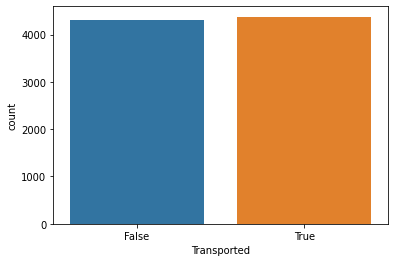

In [13]:
import seaborn as sns
sns.countplot(df.Transported)

# Imputation

In [14]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [16]:
df=df.replace(to_replace=False,value=0)
df=df.replace(to_replace=True,value=1)

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,1:3])
df.iloc[:,1:3]=imputer.transform(df.iloc[:,1:3])   

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,4:5])
df.iloc[:,4:5]=imputer.transform(df.iloc[:,4:5])

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df.iloc[:,5:6])
df.iloc[:,5:6]=imputer.transform(df.iloc[:,5:6])

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,6:7])
df.iloc[:,6:7]=imputer.transform(df.iloc[:,6:7])  

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df.iloc[:,7:12])
df.iloc[:,7:12]=imputer.transform(df.iloc[:,7:12])

# Data Pre-processing

In [18]:
# Feature Engineering (information extract) from Cabin
# Dividing Cabin column
df['Deck'] = df['Cabin'].str[0]
df['Side'] = df['Cabin'].str[-1]
df.drop(['Cabin'], axis=1, inplace=True)

In [19]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,13:15])
df.iloc[:,13:15]=imputer.transform(df.iloc[:,13:15]) 

In [20]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,B,P
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,F,S
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,A,S
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,A,S
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,F,S


In [21]:
# Correlation matrix

In [22]:
features_to_drop = ['PassengerId', 'HomePlanet', 'Destination', 'Name', 'Transported'] 
df_CM = df.drop(features_to_drop, axis=1)
df_CM.shape

(12970, 10)

In [23]:
df_CM.corr(method='pearson')

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,1.000000,-0.063832,-0.076891,-0.251759,-0.208124,-0.215163,-0.199169,-0.190276
Age,-0.063832,1.000000,0.080695,0.066101,0.121210,0.034182,0.115982,0.099858
VIP,-0.076891,0.080695,1.000000,0.059386,0.122825,0.024184,0.080705,0.110160
RoomService,-0.251759,0.066101,0.059386,1.000000,-0.019720,0.055787,0.008801,-0.023429
FoodCourt,-0.208124,0.121210,0.122825,-0.019720,1.000000,-0.001556,0.225865,0.240868
ShoppingMall,-0.215163,0.034182,0.024184,0.055787,-0.001556,1.000000,0.010384,0.004301
Spa,-0.199169,0.115982,0.080705,0.008801,0.225865,0.010384,1.000000,0.145348
VRDeck,-0.190276,0.099858,0.110160,-0.023429,0.240868,0.004301,0.145348,1.000000


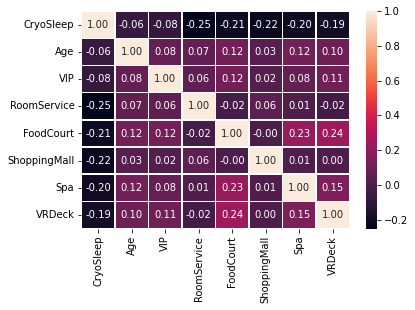

In [24]:
corr = df_CM.corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5)

In [25]:
dummies = pd.get_dummies(df, columns=['HomePlanet', 'Destination',	'Deck', 'Side'], drop_first=False)  

In [26]:
features_to_drop = ['PassengerId',	'HomePlanet',	'CryoSleep',	'Deck', 'Side',	'Destination',	'Age',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck',	'Name',	'Transported']
df = df.drop(features_to_drop, axis=1)
df.shape

(12970, 0)

In [27]:
df_new = pd.concat([df, dummies], axis=1)

In [28]:
df_new.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,0,0,1,0,0,0,1


In [29]:
features_to_drop = ['PassengerId','Name'] 
df_new = df_new.drop(features_to_drop, axis=1)
df_new.shape

(12970, 25)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


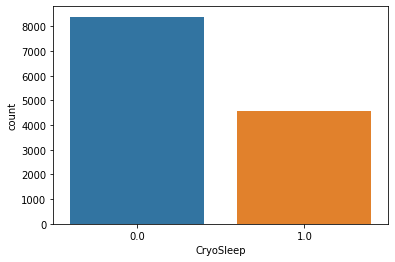

In [30]:
sns.countplot(df_new.CryoSleep)

In [31]:
df_new.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1,...,0,0,0,0,0,1,0,0,0,1
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1,...,0,0,0,0,0,1,0,0,0,1


# Preparing Train and Test dataset

In [32]:
train = df_new.iloc[:8693]
train.shape

(8693, 25)

In [33]:
X = train.drop(['Transported'], axis=1)
y = train.Transported

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   

In [35]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)  

In [36]:
# Select categorical predictors
cat_features = df_new.select_dtypes(include='object').columns.to_list()

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  float64
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  float64
 3   RoomService                12970 non-null  float64
 4   FoodCourt                  12970 non-null  float64
 5   ShoppingMall               12970 non-null  float64
 6   Spa                        12970 non-null  float64
 7   VRDeck                     12970 non-null  float64
 8   Transported                8693 non-null   float64
 9   HomePlanet_Earth           12970 non-null  uint8  
 10  HomePlanet_Europa          12970 non-null  uint8  
 11  HomePlanet_Mars            12970 non-null  uint8  
 12  Destination_55 Cancri e    12970 non-null  uint8  
 13  Destination_PSO J318.5-22  12970 non-null  uint

# Modelling - all algos together

In [38]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

model = [
    DecisionTreeClassifier(max_depth=3, criterion='entropy'),
    RandomForestClassifier(n_estimators=3, criterion='entropy'),
    AdaBoostClassifier(n_estimators=3),     
    GradientBoostingClassifier(n_estimators=3, max_depth=3),
    XGBClassifier(n_estimators=3, max_depth=3),
    CatBoostClassifier(depth=6, silent=True)
]

In [42]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

#Do some preperation for the loop
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in model:
    
    a.fit(X_train, y_train)
    pred = a.predict(X_test)
    acc_train = accuracy_score(y_train, a.predict(X_train)) 
    acc_test = accuracy_score(y_test, pred) 
    f1 = f1_score(y_test, pred)
    cv = cross_val_score(a, X_test, y_test).mean()
    auc = roc_auc_score(y_test, pred)
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Accuracy [train]'] = round(acc_train * 100, 2)
    algorithms.loc[idx, 'Accuracy [test]'] = round(acc_test * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)
    algorithms.loc[idx, 'AUC Score'] = round(auc * 100, 2)

    idx+=1

In [43]:
algorithms.sort_values(by='AUC Score', ascending=False)

,Algorithm,Accuracy [train],Accuracy [test],F1 Score,CV Score,AUC Score
5,CatBoostClassifier,85.76,81.83,82.21,80.05,81.82
1,RandomForestClassifier,91.53,77.98,77.93,74.35,77.98
3,GradientBoostingClassifier,75.93,74.70,72.84,75.05,74.75
4,XGBClassifier,75.93,74.70,72.84,75.10,74.75
0,DecisionTreeClassifier,71.96,71.31,66.22,69.12,71.42
2,AdaBoostClassifier,70.75,68.32,69.10,72.00,68.30


# Hyper-parameter tunning

In [44]:
#Catboost

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'iterations':[100,500,1000],
            'learning_rate':[0.01,0.1,0.5],
            'depth':[3,6,10]
            }      

In [46]:
grid = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fea5ac31700>,
             n_jobs=-1,
             param_grid={'depth': [3, 6, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.1, 0.5]},
             verbose=1)

In [47]:
grid.best_params_

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.01}

In [48]:
#{'depth': 6, 'iterations': 1000, 'learning_rate': 0.01}

In [49]:
grid.best_score_

0.807881706137606

In [50]:
#AdaBoostClassifier

In [51]:
param_grid = {
            'n_estimators':[10, 100, 1000],
            'learning_rate':[0.01, 0.1, 1.0]
            }    

In [52]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [10, 100, 1000]},
             verbose=1)

In [53]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [54]:
grid.best_score_

0.7861675002198097

In [55]:
#GradientBoostingClassifier

In [56]:
param_grid = {
            'n_estimators':[10, 100, 1000],
            'max_depth':[2, 6, 8, 10, 12, 20]
            }  

In [57]:
grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 8, 10, 12, 20],
                         'n_estimators': [10, 100, 1000]},
             verbose=1)

In [58]:
grid.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [59]:
grid.best_score_

0.795802202235336